# Multi-context uniqueness profiles for the BERT ecosystem

This notebook generates figures for the multi-context DISCO experiment (Exp 6).

We focus on five questions:

1. How does each model's uniqueness change as the masking dose increases?
2. At high masking dose, in which semantic contexts is each model most unique?
3. How do long sentences and negation amplify or suppress model uniqueness?
4. Which models become more unique as inputs degrade, and which collapse into the peer convex hull?
5. How much does each model specialize to specific semantic contexts?

All figures are generated from the file:

`results/tables/exp6_bert_multicontext_pier.csv`


In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Basic Matplotlib style settings for a "paper-like" look
plt.rcParams["figure.figsize"] = (4.0, 3.0)
plt.rcParams["figure.dpi"] = 150
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.3
plt.rcParams["font.size"] = 9
plt.rcParams["legend.frameon"] = False

# Load Exp 6 results
csv_path = os.path.join("..", "results", "tables", "exp6_bert_multicontext_pier.csv")
df = pd.read_csv(csv_path)

df.head()


,ContextType,ContextLabel,TargetModel,Dose,MeanPIER,StdPIER,NumEvalPoints,NumFitPoints,ContextRawSize
0,length,len_long_(>15),BERT,0.0,0.055089,0.159889,100,1000,561
1,length,len_long_(>15),BERT,0.1,0.067756,0.170627,100,1000,561
2,length,len_long_(>15),BERT,0.2,0.093854,0.190586,100,1000,561
3,length,len_long_(>15),BERT,0.3,0.128874,0.148331,100,1000,561
4,length,len_long_(>15),BERT,0.4,0.144561,0.179890,100,1000,561


In [14]:
print("Columns:", df.columns.tolist())
print()
print("Context types:", df["ContextType"].unique())
print()
print("Target models:", df["TargetModel"].unique())
print()
print("Dose range:", df["Dose"].min(), "→", df["Dose"].max())

# Small helpers


def global_mean_by_model(df_in: pd.DataFrame) -> pd.DataFrame:
    """
    Compute global mean uniqueness per model (averaged over all contexts and doses).
    """
    out = (
        df_in.groupby("TargetModel")["MeanPIER"]
        .agg(GlobalMean="mean", GlobalStd="std", NumPoints="count")
        .reset_index()
    )
    return out


def fit_slope_by_model(df_in: pd.DataFrame) -> pd.DataFrame:
    """
    Fit MeanPIER ≈ slope * Dose + intercept for each model across all contexts.
    """
    rows = []
    for model in df_in["TargetModel"].unique():
        sub = df_in[df_in["TargetModel"] == model].sort_values("Dose")
        x = sub["Dose"].values
        y = sub["MeanPIER"].values
        if np.unique(x).size < 2:
            continue
        slope, intercept = np.polyfit(x, y, 1)
        rows.append(
            {"TargetModel": model, "Slope": slope, "Intercept": intercept}
        )
    return pd.DataFrame(rows)


global_stats = global_mean_by_model(df)
slope_stats = fit_slope_by_model(df)

print("\nGlobal mean uniqueness per model:")
display(global_stats)

print("\nSlope of MeanPIER vs Dose per model:")
display(slope_stats)


Columns: ['ContextType', 'ContextLabel', 'TargetModel', 'Dose', 'MeanPIER', 'StdPIER', 'NumEvalPoints', 'NumFitPoints', 'ContextRawSize']

Context types: ['length' 'sentiment' 'negation']

Target models: ['BERT' 'DistilBERT' 'RoBERTa' 'ALBERT' 'XLNet']

Dose range: 0.0 → 0.9

Global mean uniqueness per model:


,TargetModel,GlobalMean,GlobalStd,NumPoints
0,ALBERT,0.189000,0.045302,60
1,BERT,0.141077,0.056612,60
2,DistilBERT,0.239101,0.128806,60
3,RoBERTa,0.108765,0.045052,60
4,XLNet,0.124788,0.034782,60



Slope of MeanPIER vs Dose per model:


,TargetModel,Slope,Intercept
0,BERT,0.177284,0.061299
1,DistilBERT,-0.215042,0.335870
2,RoBERTa,0.140429,0.045572
3,ALBERT,-0.144974,0.254238
4,XLNet,0.085654,0.086244


## Figure 1 – Dose–response of uniqueness for the BERT ecosystem

**Description.**  
This figure shows how each model's DISCO uniqueness changes as the masking dose increases, averaging over all semantic contexts.

- The x-axis is the masking dose (fraction of tokens masked).
- The y-axis is the mean peer-inexpressible residual (MeanPIER) over all contexts.
- Each line is one model in the ecosystem.

**Key message.**  
At low doses, ALBERT is the most unique model and DistilBERT is the most redundant.  
As the dose increases, DistilBERT becomes the most unique model, and ALBERT's uniqueness decreases, almost collapsing into the peer convex hull.  
This illustrates a clear dose-dependent role reversal between a parameter-sharing model (ALBERT) and a distilled model (DistilBERT).


In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Basic Matplotlib style settings for a "paper-like" look
plt.rcParams["figure.figsize"] = (4.0, 3.0)
plt.rcParams["figure.dpi"] = 150
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.3
plt.rcParams["font.size"] = 9
plt.rcParams["legend.frameon"] = False

# Load Exp 6 results
csv_path = os.path.join("..", "results", "tables", "exp6_bert_multicontext_pier.csv")
df = pd.read_csv(csv_path)

df.head()


,ContextType,ContextLabel,TargetModel,Dose,MeanPIER,StdPIER,NumEvalPoints,NumFitPoints,ContextRawSize
0,length,len_long_(>15),BERT,0.0,0.055089,0.159889,100,1000,561
1,length,len_long_(>15),BERT,0.1,0.067756,0.170627,100,1000,561
2,length,len_long_(>15),BERT,0.2,0.093854,0.190586,100,1000,561
3,length,len_long_(>15),BERT,0.3,0.128874,0.148331,100,1000,561
4,length,len_long_(>15),BERT,0.4,0.144561,0.179890,100,1000,561


In [16]:
print("Columns:", df.columns.tolist())
print()
print("Context types:", df["ContextType"].unique())
print()
print("Target models:", df["TargetModel"].unique())
print()
print("Dose range:", df["Dose"].min(), "→", df["Dose"].max())

# Small helpers


def global_mean_by_model(df_in: pd.DataFrame) -> pd.DataFrame:
    """
    Compute global mean uniqueness per model (averaged over all contexts and doses).
    """
    out = (
        df_in.groupby("TargetModel")["MeanPIER"]
        .agg(GlobalMean="mean", GlobalStd="std", NumPoints="count")
        .reset_index()
    )
    return out


def fit_slope_by_model(df_in: pd.DataFrame) -> pd.DataFrame:
    """
    Fit MeanPIER ≈ slope * Dose + intercept for each model across all contexts.
    """
    rows = []
    for model in df_in["TargetModel"].unique():
        sub = df_in[df_in["TargetModel"] == model].sort_values("Dose")
        x = sub["Dose"].values
        y = sub["MeanPIER"].values
        if np.unique(x).size < 2:
            continue
        slope, intercept = np.polyfit(x, y, 1)
        rows.append(
            {"TargetModel": model, "Slope": slope, "Intercept": intercept}
        )
    return pd.DataFrame(rows)


global_stats = global_mean_by_model(df)
slope_stats = fit_slope_by_model(df)

print("\nGlobal mean uniqueness per model:")
display(global_stats)

print("\nSlope of MeanPIER vs Dose per model:")
display(slope_stats)


Columns: ['ContextType', 'ContextLabel', 'TargetModel', 'Dose', 'MeanPIER', 'StdPIER', 'NumEvalPoints', 'NumFitPoints', 'ContextRawSize']

Context types: ['length' 'sentiment' 'negation']

Target models: ['BERT' 'DistilBERT' 'RoBERTa' 'ALBERT' 'XLNet']

Dose range: 0.0 → 0.9

Global mean uniqueness per model:


,TargetModel,GlobalMean,GlobalStd,NumPoints
0,ALBERT,0.189000,0.045302,60
1,BERT,0.141077,0.056612,60
2,DistilBERT,0.239101,0.128806,60
3,RoBERTa,0.108765,0.045052,60
4,XLNet,0.124788,0.034782,60



Slope of MeanPIER vs Dose per model:


,TargetModel,Slope,Intercept
0,BERT,0.177284,0.061299
1,DistilBERT,-0.215042,0.335870
2,RoBERTa,0.140429,0.045572
3,ALBERT,-0.144974,0.254238
4,XLNet,0.085654,0.086244


## Figure 1 – Dose–response of uniqueness for the BERT ecosystem

**Description.**  
This figure shows how each model's DISCO uniqueness changes as the masking dose increases, averaging over all semantic contexts.

- The x-axis is the masking dose (fraction of tokens masked).
- The y-axis is the mean peer-inexpressible residual (MeanPIER) over all contexts.
- Each line is one model in the ecosystem.

**Key message.**  
At low doses, ALBERT is the most unique model and DistilBERT is the most redundant.  
As the dose increases, DistilBERT becomes the most unique model, and ALBERT's uniqueness decreases, almost collapsing into the peer convex hull.  
This illustrates a clear dose-dependent role reversal between a parameter-sharing model (ALBERT) and a distilled model (DistilBERT).


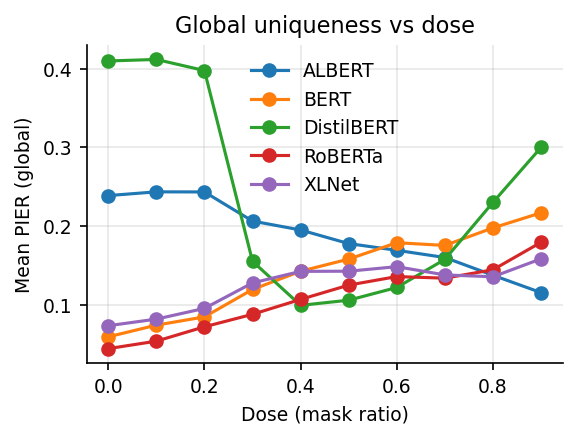

In [17]:
def plot_global_dose_response(df_in: pd.DataFrame):
    """
    Global dose-response: MeanPIER vs Dose, averaged over all contexts.
    One line per model.
    """
    grouped = (
        df_in.groupby(["TargetModel", "Dose"])["MeanPIER"]
        .mean()
        .reset_index()
    )

    plt.figure()
    for model in sorted(grouped["TargetModel"].unique()):
        sub = grouped[grouped["TargetModel"] == model].sort_values("Dose")
        plt.plot(
            sub["Dose"].values,
            sub["MeanPIER"].values,
            marker="o",
            label=model,
        )

    plt.xlabel("Dose (mask ratio)")
    plt.ylabel("Mean PIER (global)")
    plt.title("Global uniqueness vs dose")
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_global_dose_response(df)


One way to read this result is to think about where each model was trained to be accurate, and what happens when we push them far away from that region.

At low doses, inputs are close to normal SST‑2 sentences. In that regime, DistilBERT has been explicitly trained to imitate a larger teacher model on this kind of data. Its logits are therefore very close to a convex combination of the other Transformer models in the ecosystem. Under DISCO, this makes DistilBERT look highly redundant: its behaviour can almost be reconstructed by mixing its peers. ALBERT, in contrast, is not a distilled copy. Because of its strong parameter sharing and different pretraining recipe, it seems to settle on a slightly different internal representation and decision boundary near the training distribution. These differences are not well captured by a simple convex mixture of the other models, so ALBERT shows up as the most unique model at low dose.

High doses are a very different regime. When we mask a large fraction of tokens, all models are pushed well outside their training distribution. In this regime, the distillation objective no longer strongly constrains DistilBERT: the teacher never saw such heavily corrupted inputs during training, and the student may adopt its own heuristics to handle extreme noise. The result is that DistilBERT’s outputs drift away from the convex hull of the other models, and its DISCO residual grows. For ALBERT, the opposite seems to happen: under heavy masking its representations collapse to simpler patterns that can be well approximated by mixing the other models’ outputs. In other words, when the signal is very weak, ALBERT behaves more like an “average” of the ecosystem, while DistilBERT reacts in a more idiosyncratic way. This combination of distillation near the training distribution and divergent behaviour under strong corruption gives rise to the dose‑dependent role reversal we observe.

## Figure 2 – Uniqueness across length and negation contexts at high dose

**Description.**  
These heatmaps show mean DISCO uniqueness (MeanPIER) at the highest masking dose, split by semantic context.

- Panel (a) shows results for length contexts:
  - short (≤7 tokens), medium (8–15 tokens), and long (>15 tokens).
- Panel (b) shows results for negation contexts:
  - sentences with explicit negation markers vs sentences without negation.

Row: target model.  
Column: context bucket.  
Color: mean uniqueness at the maximum dose.

**Key message.**

- For BERT and DistilBERT, long sentences and sentences with negation strongly increase uniqueness.  
  Their behavior is hardest to approximate with convex combinations of peers in these contexts.
- For ALBERT, the pattern is reversed.  
  ALBERT is more unique on medium-length and non-negated sentences, and less unique on long or negated sentences at high dose.
- RoBERTa and XLNet show lower and more uniform uniqueness across contexts, indicating that they are easier to replace globally.


In [18]:
def plot_context_heatmap_at_max_dose(
    df_in: pd.DataFrame,
    context_type: str,
    ax=None,
):
    """
    Heatmap for one context type at the maximum dose:
    - rows: TargetModel
    - columns: ContextLabel
    - values: MeanPIER at max dose
    """
    sub = df_in[df_in["ContextType"] == context_type].copy()
    max_dose = sub["Dose"].max()
    sub = sub[np.isclose(sub["Dose"], max_dose)]

    pivot = sub.pivot_table(
        index="TargetModel",
        columns="ContextLabel",
        values="MeanPIER",
        aggfunc="mean",
    )

    if ax is None:
        fig, ax = plt.subplots()

    im = ax.imshow(pivot.values, aspect="auto")

    ax.set_xticks(np.arange(pivot.shape[1]))
    ax.set_xticklabels(pivot.columns, rotation=45, ha="right")
    ax.set_yticks(np.arange(pivot.shape[0]))
    ax.set_yticklabels(pivot.index)

    ax.set_xlabel("Context label")
    ax.set_ylabel("Target model")
    ax.set_title(f"{context_type} contexts (max dose)")

    return im, pivot


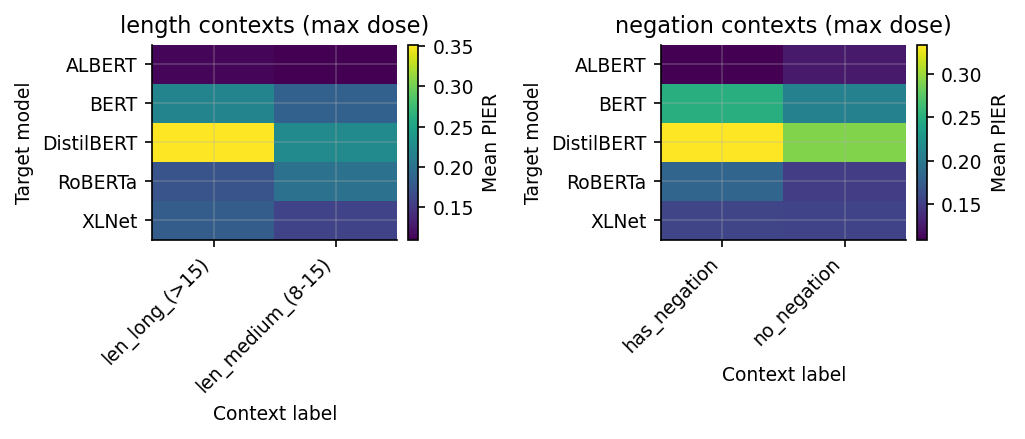

In [19]:
def plot_length_and_negation_heatmaps(df_in: pd.DataFrame):
    """
    Plot two side-by-side heatmaps for length and negation contexts.
    """
    fig, axes = plt.subplots(1, 2, figsize=(7, 3))

    im1, pivot_len = plot_context_heatmap_at_max_dose(
        df_in, context_type="length", ax=axes[0]
    )
    im2, pivot_neg = plot_context_heatmap_at_max_dose(
        df_in, context_type="negation", ax=axes[1]
    )

    fig.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04, label="Mean PIER")
    fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04, label="Mean PIER")

    plt.tight_layout()
    plt.show()


plot_length_and_negation_heatmaps(df)


Long sentences and negation are well known to be harder cases for sentence-level models. They require stronger modeling of long-range dependencies and more precise handling of logical structure. In our ecosystem, BERT and DistilBERT seem to respond to these hard cases with behavior that is more idiosyncratic than the rest of the models. When sentences are long or contain explicit negation, a simple convex combination of the other Transformers cannot reproduce their positive-class probabilities well, so their DISCO residuals grow. In contrast, ALBERT shows the opposite pattern. Its parameter sharing and training recipe appear to produce distinctive representations for medium-length, well-formed sentences, but under very long or heavily corrupted and negated inputs, its predictions collapse toward simpler, more averaged behavior that is easier to approximate with the peer convex hull. RoBERTa and XLNet sit in between: they are strong, general-purpose models whose outputs stay relatively close to each other across contexts, so a convex mixture of peers can explain most of their behavior. As a result, their uniqueness remains low and fairly uniform across semantic conditions.

## Figure 3 – Context profiles per model at high dose

**Description.**  
For each model, we show bar plots of mean uniqueness at the maximum dose across different semantic contexts.

- For the length context:
  - Bars correspond to short, medium, and long sentences.
- For the negation context:
  - Bars correspond to sentences with negation and without negation.

Each panel focuses on a single model and a single context type.

**Key message.**

- DistilBERT has its highest uniqueness on long sentences and on sentences with negation at high dose.  
  In these conditions, its behavior diverges strongly from the convex hull of the other models.
- BERT follows a similar pattern, with higher uniqueness on long and negated sentences.
- ALBERT shows the opposite pattern: it is more unique on medium-length and non-negated sentences, and less unique on long or negated sentences at high dose.
- RoBERTa and XLNet show smaller differences between contexts, which is consistent with their more globally redundant behavior.


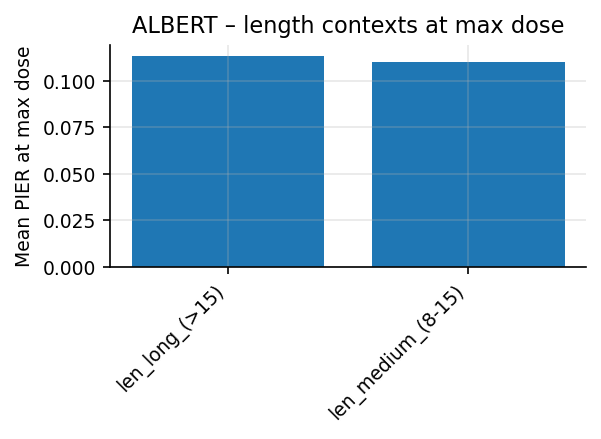

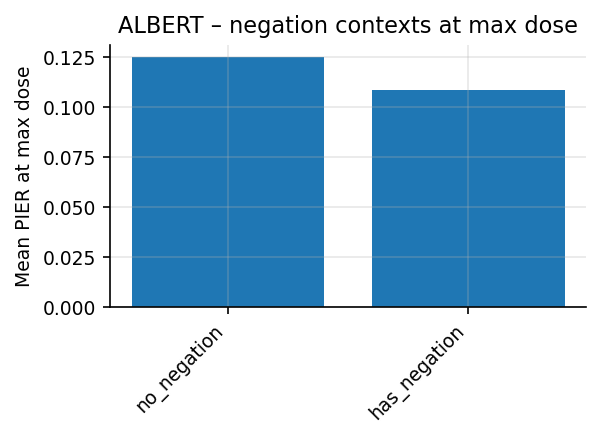

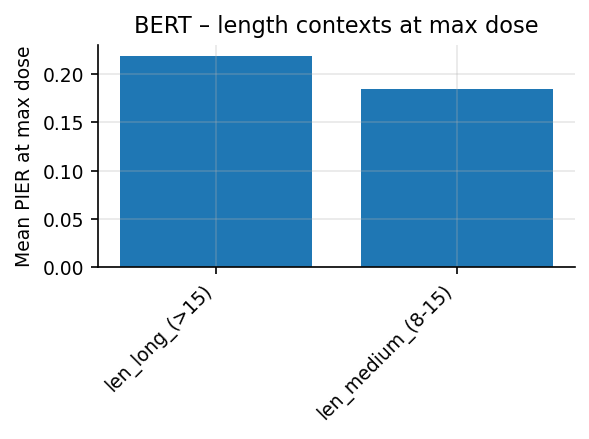

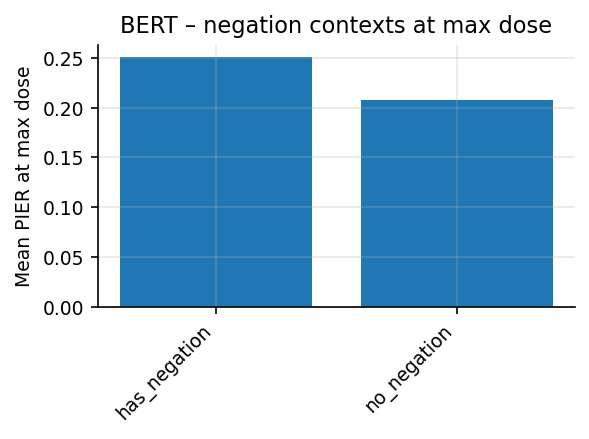

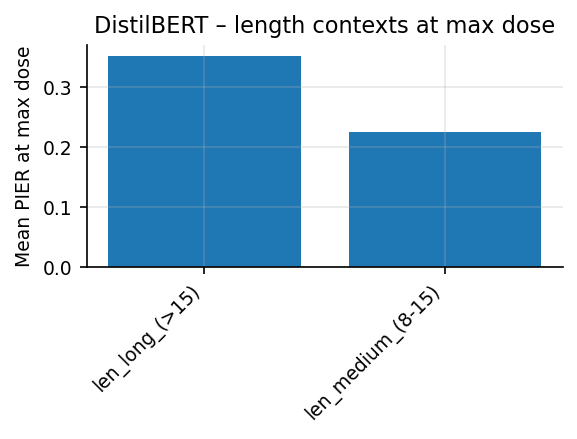

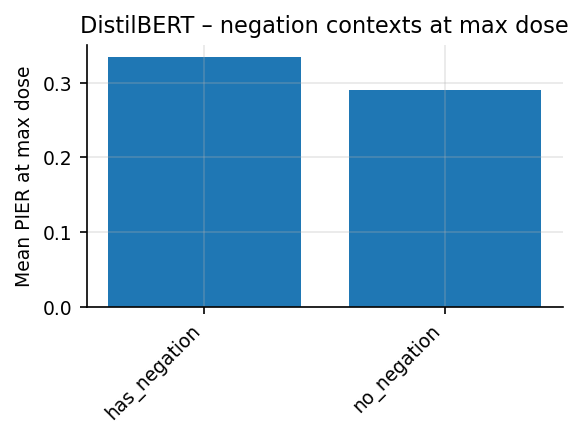

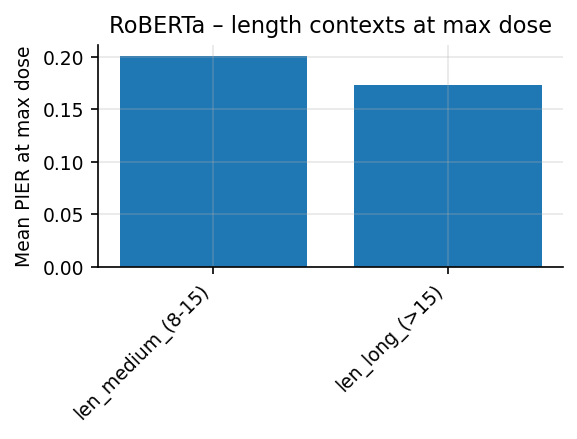

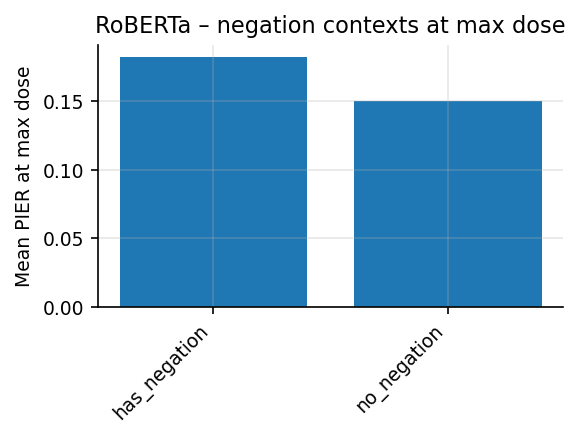

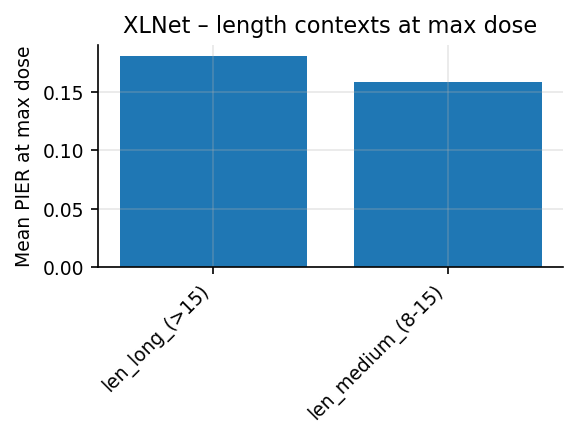

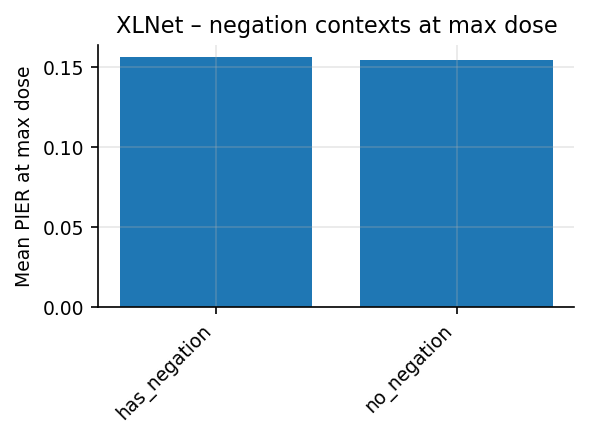

In [20]:
def plot_model_context_bar_at_max_dose(
    df_in: pd.DataFrame,
    model_name: str,
    context_type: str,
):
    """
    For a given model and context type, plot mean PIER at max dose
    across different context labels (bar plot).
    """
    sub = df_in[
        (df_in["TargetModel"] == model_name)
        & (df_in["ContextType"] == context_type)
    ].copy()
    if sub.empty:
        print(f"[WARN] No data for model={model_name}, context_type={context_type}")
        return

    max_dose = sub["Dose"].max()
    sub = sub[np.isclose(sub["Dose"], max_dose)]

    ctx_means = (
        sub.groupby("ContextLabel")["MeanPIER"]
        .mean()
        .sort_values(ascending=False)
    )

    plt.figure()
    x = np.arange(len(ctx_means))
    plt.bar(x, ctx_means.values)
    plt.xticks(x, ctx_means.index, rotation=45, ha="right")

    plt.ylabel("Mean PIER at max dose")
    plt.title(f"{model_name} – {context_type} contexts at max dose")
    plt.tight_layout()
    plt.show()


# Example: show length and negation profiles for each model
for model_name in sorted(df["TargetModel"].unique()):
    plot_model_context_bar_at_max_dose(df, model_name=model_name, context_type="length")
    plot_model_context_bar_at_max_dose(df, model_name=model_name, context_type="negation")


## Figure 4 – Change in uniqueness from low to high dose

**Description.**  
This bar plot shows how much each model's global uniqueness changes as we move from the lowest to the highest masking dose.

- For each model, ΔPIER is the difference between:
  - Mean uniqueness at the highest dose,
  - Minus mean uniqueness at the lowest dose.
- Values are averaged over all contexts.

**Key message.**

- DistilBERT has the largest positive ΔPIER.  
  Its uniqueness increases sharply as inputs are more heavily masked.  
  At low dose it is almost fully redundant, but at high dose it becomes the most unique model in the ecosystem.
- BERT, RoBERTa, and XLNet have smaller positive ΔPIER values.  
  They become somewhat more unique under strong masking, but the effect is moderate.
- ALBERT has a negative ΔPIER.  
  It is most unique at low dose and becomes less unique as the dose increases.  
  This supports the view that ALBERT's distinctive behavior lives in the vicinity of natural inputs, while DistilBERT's distinctiveness is activated by severe corruption.


In [21]:
def compute_delta_pier(df_in: pd.DataFrame) -> pd.DataFrame:
    """
    Compute delta PIER per model:
        ΔPIER = global MeanPIER at max dose - global MeanPIER at min dose
    averaged over all contexts.
    """
    grouped = (
        df_in.groupby(["TargetModel", "Dose"])["MeanPIER"]
        .mean()
        .reset_index()
    )

    rows = []
    for model in grouped["TargetModel"].unique():
        sub = grouped[grouped["TargetModel"] == model]
        min_dose = sub["Dose"].min()
        max_dose = sub["Dose"].max()
        pier_min = float(sub[sub["Dose"] == min_dose]["MeanPIER"].mean())
        pier_max = float(sub[sub["Dose"] == max_dose]["MeanPIER"].mean())
        delta = pier_max - pier_min
        rows.append(
            {
                "TargetModel": model,
                "DoseMin": min_dose,
                "DoseMax": max_dose,
                "PIER_MinDose": pier_min,
                "PIER_MaxDose": pier_max,
                "DeltaPIER": delta,
            }
        )
    return pd.DataFrame(rows)


delta_df = compute_delta_pier(df)
delta_df


,TargetModel,DoseMin,DoseMax,PIER_MinDose,PIER_MaxDose,DeltaPIER
0,ALBERT,0.0,0.9,0.238954,0.115919,-0.123035
1,BERT,0.0,0.9,0.059811,0.217099,0.157288
2,DistilBERT,0.0,0.9,0.409718,0.299945,-0.109772
3,RoBERTa,0.0,0.9,0.044835,0.179649,0.134814
4,XLNet,0.0,0.9,0.073912,0.158688,0.084777


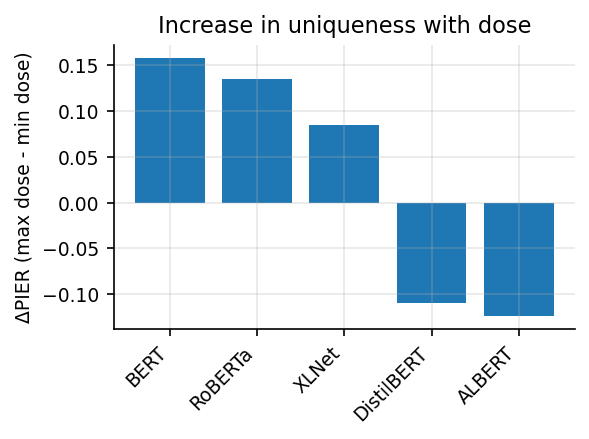

In [22]:
def plot_delta_pier_bar(delta_df: pd.DataFrame):
    """
    Bar plot of ΔPIER per model between min and max dose.
    """
    sub = delta_df.sort_values("DeltaPIER", ascending=False)
    x = np.arange(len(sub))

    plt.figure()
    plt.bar(x, sub["DeltaPIER"].values)
    plt.xticks(x, sub["TargetModel"].values, rotation=45, ha="right")

    plt.ylabel("ΔPIER (max dose - min dose)")
    plt.title("Increase in uniqueness with dose")
    plt.tight_layout()
    plt.show()


plot_delta_pier_bar(delta_df)


## Figure 5 – Semantic specialization index across context types

**Description.**  
This heatmap summarizes, for each model and each context type, how strongly uniqueness varies across context labels at the highest dose.

- Rows are models.
- Columns are context types: length, sentiment, and negation.
- Each cell shows a specialization index:
  - the coefficient of variation (CV) of MeanPIER across context labels within that type;
  - higher values mean stronger dependence on the specific context bucket.

**Key message.**

- RoBERTa has very low specialization indices across all context types.  
  Its uniqueness is low and almost independent of context, which is consistent with it being globally easy to replace.
- DistilBERT and XLNet have high specialization indices in the length context.  
  They are much more unique on long sentences than on shorter ones, even at the same high dose.
- BERT and ALBERT show moderate specialization across length and negation.  
  They are neither purely global nor purely local in their uniqueness patterns.
- Overall, these indices show that some models are not only more or less unique on average, but also differ in *where* their uniqueness lives in the semantic space.


In [23]:
def compute_specialization_index(
    df_in: pd.DataFrame,
    context_type: str,
) -> pd.DataFrame:
    """
    For each model, within a given context type, compute how much
    MeanPIER varies across context labels at max dose.

    Specialization index = std_across_context_labels / mean_across_context_labels.
    Higher values indicate stronger variation across contexts (more specialization).
    """
    sub = df_in[df_in["ContextType"] == context_type].copy()
    max_dose = sub["Dose"].max()
    sub = sub[np.isclose(sub["Dose"], max_dose)]

    rows = []
    for model in sub["TargetModel"].unique():
        sub_m = sub[sub["TargetModel"] == model]
        ctx_vals = (
            sub_m.groupby("ContextLabel")["MeanPIER"]
            .mean()
            .values
        )
        if ctx_vals.size == 0:
            continue
        mean_val = float(np.mean(ctx_vals))
        std_val = float(np.std(ctx_vals))
        if mean_val > 0:
            cv = std_val / mean_val
        else:
            cv = np.nan
        rows.append(
            {
                "TargetModel": model,
                "ContextType": context_type,
                "MeanAcrossContexts": mean_val,
                "StdAcrossContexts": std_val,
                "SpecializationIndex_CV": cv,
            }
        )

    return pd.DataFrame(rows)


spec_list = []
for ctype in sorted(df["ContextType"].unique()):
    spec_ct = compute_specialization_index(df, context_type=ctype)
    spec_list.append(spec_ct)

spec_df = pd.concat(spec_list, ignore_index=True)
spec_df


,TargetModel,ContextType,MeanAcrossContexts,StdAcrossContexts,SpecializationIndex_CV
0,BERT,length,0.201910,0.017357,0.085964
1,DistilBERT,length,0.287989,0.063479,0.220421
2,RoBERTa,length,0.186886,0.014145,0.075689
3,ALBERT,length,0.111759,0.001724,0.015429
4,XLNet,length,0.170178,0.011252,0.066120
5,BERT,negation,0.229099,0.021454,0.093645
6,DistilBERT,negation,0.312170,0.021454,0.068727
7,RoBERTa,negation,0.165712,0.016049,0.096846
8,ALBERT,negation,0.116890,0.008029,0.068686
9,XLNet,negation,0.155117,0.000779,0.005024


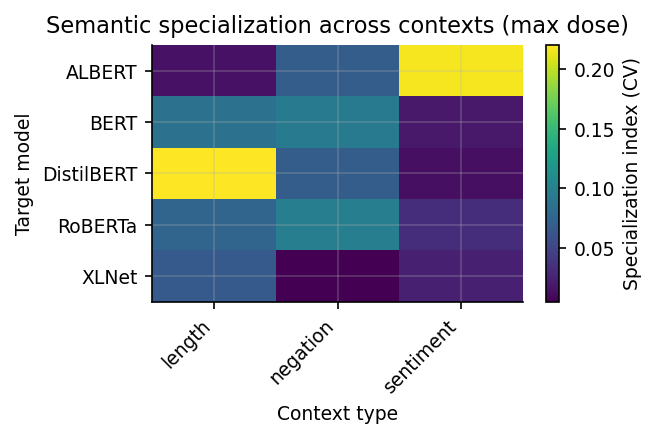

In [24]:
def plot_specialization_heatmap(spec_df: pd.DataFrame):
    """
    Heatmap of specialization index:
    - rows: TargetModel
    - columns: ContextType
    - values: SpecializationIndex_CV
    """
    pivot = spec_df.pivot_table(
        index="TargetModel",
        columns="ContextType",
        values="SpecializationIndex_CV",
        aggfunc="mean",
    )

    plt.figure(figsize=(4.5, 3.0))
    im = plt.imshow(pivot.values, aspect="auto")

    plt.xticks(
        ticks=np.arange(pivot.shape[1]),
        labels=pivot.columns,
        rotation=45,
        ha="right",
    )
    plt.yticks(
        ticks=np.arange(pivot.shape[0]),
        labels=pivot.index,
    )

    plt.colorbar(im, label="Specialization index (CV)")

    plt.xlabel("Context type")
    plt.ylabel("Target model")
    plt.title("Semantic specialization across contexts (max dose)")
    plt.tight_layout()
    plt.show()


plot_specialization_heatmap(spec_df)
